In [1]:
import pandas as pd
import numpy as np

dfTrain = pd.read_csv("train.csv")
trainText = dfTrain["ABSTRACT"]

In [2]:
times = [[], [], [], [], [], []]

In [19]:
import nltk 
import time
from sklearn.feature_extraction.text import TfidfVectorizer

lemmatizer = nltk.WordNetLemmatizer()

class TfidfVectorizerLemmatizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizerLemmatizer, self).build_analyzer()
        return lambda doc:(lemmatizer.lemmatize(w) for w in analyzer(doc))    

text = list(trainText)

for df in np.arange(0.5, 0.96, 0.01):
    model = TfidfVectorizerLemmatizer(decode_error='ignore', max_df=df, min_df=2, stop_words='english')

    start = time.time()
    model.fit_transform(text)
    end = time.time()

    times[0].append(end - start)

In [5]:
for df in np.arange(1, 10, 1):
    model = TfidfVectorizerLemmatizer(decode_error='ignore', max_df=0.95, min_df=df, stop_words='english')

    start = time.time()
    model.fit_transform(text)
    end = time.time()

    times[1].append(end - start)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

class CountVectorizerLemmatizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizerLemmatizer, self).build_analyzer()
        return lambda doc:(lemmatizer.lemmatize(w) for w in analyzer(doc))

vectorizer = CountVectorizerLemmatizer(decode_error='ignore', max_df=0.95, min_df=2, stop_words='english')
tf = vectorizer.fit_transform(text)

for topicsNum in np.arange(1, 10):
    model = LatentDirichletAllocation(n_components=topicsNum, max_iter=5, learning_method='online', learning_offset=50.)

    start = time.time()
    model.fit(tf)
    end = time.time()

    times[2].append(end - start)

    model = LatentDirichletAllocation(n_components=topicsNum, max_iter=5, learning_method='batch', learning_offset=50.)
    
    start = time.time()
    model.fit(tf)
    end = time.time()

    times[3].append(end - start)

for epoches in np.arange(1, 15):
    model = LatentDirichletAllocation(n_components=6, max_iter=epoches, learning_method='online', learning_offset=50.)
    
    start = time.time()
    model.fit(tf)
    end = time.time()
    
    times[4].append(end - start)

    model = LatentDirichletAllocation(n_components=6, max_iter=epoches, learning_method='batch', learning_offset=50.)

    start = time.time()
    model.fit(tf)
    end = time.time()
    
    times[5].append(end - start)

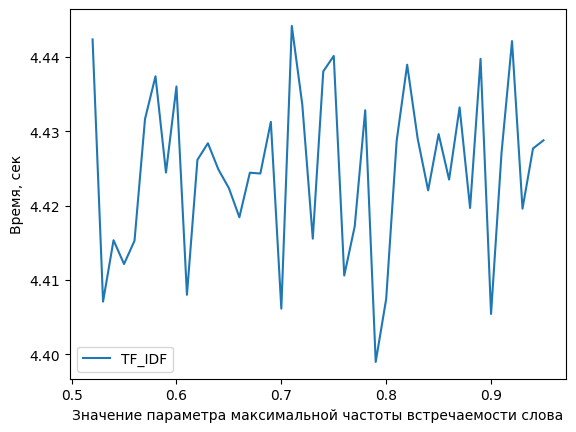

In [24]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0.52, 0.96, 0.01), times[0][2:], label="TF_IDF")

plt.legend()
plt.ylabel("Время, сек")
plt.xlabel("Значение параметра максимальной частоты встречаемости слова")
plt.show()

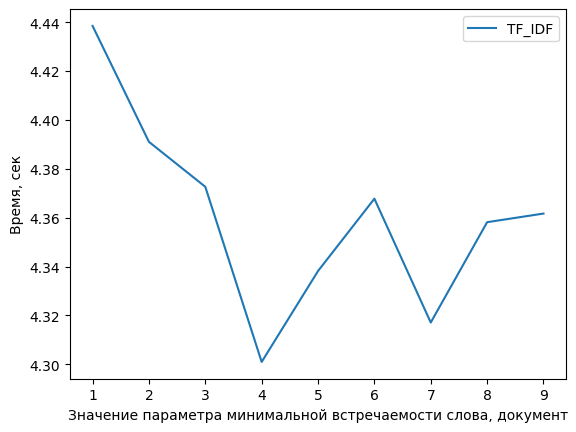

In [9]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 10), times[1], label="TF_IDF")

plt.legend()
plt.ylabel("Время, сек")
plt.xlabel("Значение параметра минимальной встречаемости слова, документ")
plt.show()

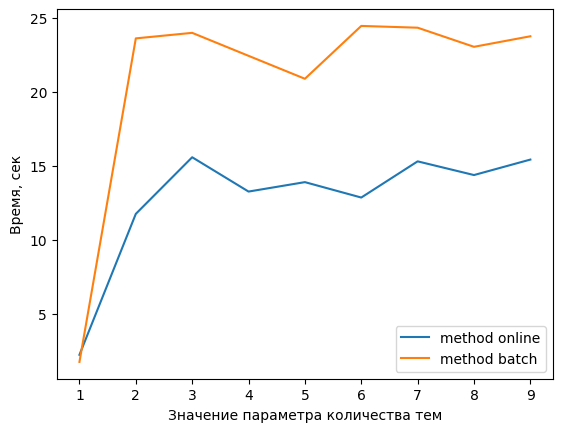

In [10]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 10), times[2], label="method online")
plt.plot(np.arange(1, 10), times[3], label="method batch")

plt.legend()
plt.ylabel("Время, сек")
plt.xlabel("Значение параметра количества тем")
plt.show()

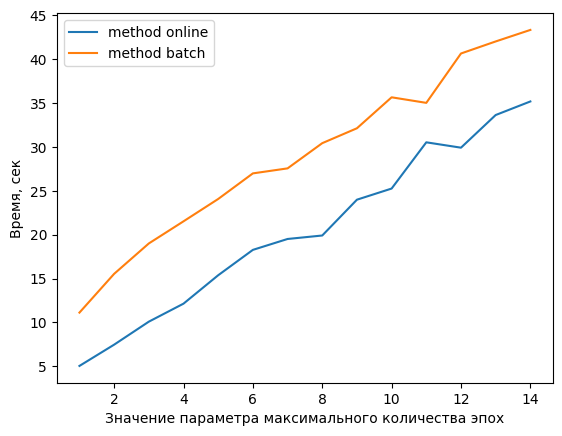

In [11]:

import matplotlib.pyplot as plt

plt.plot(np.arange(1, 15), times[4], label="method online")
plt.plot(np.arange(1, 15), times[5], label="method batch")

plt.legend()
plt.ylabel("Время, сек")
plt.xlabel("Значение параметра максимального количества эпох")
plt.show()